In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import os
import pandas as pd

from ormhw.ooi import GoldCopy

## CE04 and CE02 Wind Comparison

In [2]:
%%time
met4 = GoldCopy('CE04OSSM','SBD', 'METBK','metbk').data()
met2 = GoldCopy('CE02sHSM','SBD', 'METBK','metbk').data()
wind4 = met4[['tau','tau_x','tau_y','sirr']]
wind2 = met2[['tau','tau_x','tau_y','sirr']]

wind4 = wind4.resample('1D').mean()
wind2 = wind2.resample('1D').mean()

wind4 = wind4.rolling('8D').mean()
wind2 = wind2.rolling('8D').mean()

CPU times: user 2min 32s, sys: 13.9 s, total: 2min 46s
Wall time: 2min 55s


In [3]:
figure_directory = f"{os.path.expanduser('~')}/oregon-shelf-mhw/figures"
os.makedirs(figure_directory, exist_ok = True)
figure_save_filepath = f"{os.path.expanduser('~')}/oregon-shelf-mhw/figures/wind_comparison.png"

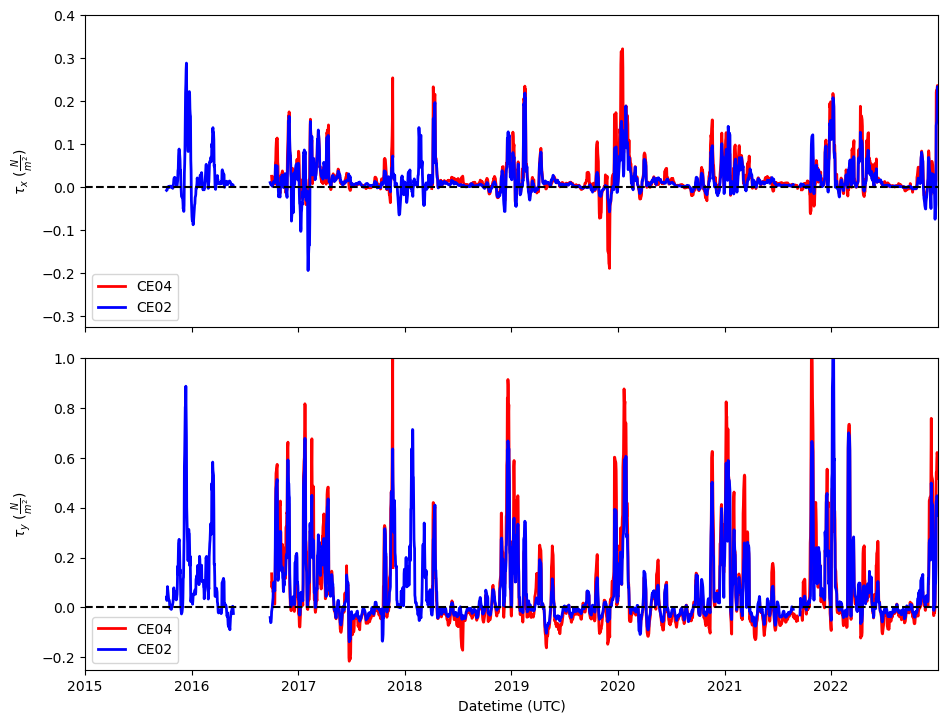

In [4]:
fig, ax = plt.subplots(2,1,figsize = (11,8.5),sharex = True)

ax[0].plot(wind4.index, wind4.tau_x, label = 'CE04', color = 'red', linewidth = 2)
ax[0].plot(wind2.index, wind2.tau_x, label = 'CE02', color = 'blue', linewidth = 2)
ax[0].legend(loc = 'lower left')
ax[0].axhline(0, color = 'black',linestyle = '--')
ax[0].set_ylabel(r'$\tau_{x}$ ($\frac{N}{m^2}$)')
ax[0].set_ylim(-0.325,0.4)

ax[1].plot(wind4.index, wind4.tau_y, label = 'CE04', color = 'red', linewidth = 2)
ax[1].plot(wind2.index, wind2.tau_y, label = 'CE02', color = 'blue', linewidth = 2)
ax[1].legend(loc = 'lower left')
ax[1].axhline(0, color = 'black',linestyle = '--')
ax[1].set_xlim(datetime(2015,1,1), datetime(2022,12,31,23,59,59))
ax[1].set_ylabel(r'$\tau_{y}$ ($\frac{N}{m^2}$)')
ax[1].set_ylim(-0.25,1)

ax[1].set_xlabel('Datetime (UTC)')
plt.subplots_adjust(hspace = 0.1)

plt.savefig(figure_save_filepath)

## CE01 Seafloor Temperature

In [5]:
%%time
seafloor = GoldCopy('CE01ISSM', 'MF', 'CTD','ctd').data()
seafloor = seafloor[(seafloor.index >= datetime(2019,6,20)) & (seafloor.index <= datetime(2019,10,29))]
seafloor = seafloor.sort_index()
seafloor_avg = seafloor.resample('1D').mean()

CPU times: user 13.2 s, sys: 524 ms, total: 13.8 s
Wall time: 27.3 s


In [6]:
figure_directory = f"{os.path.expanduser('~')}/oregon-shelf-mhw/figures"
os.makedirs(figure_directory, exist_ok = True)
figure_save_filepath = f"{os.path.expanduser('~')}/oregon-shelf-mhw/figures/ooi_ce01_seafloor_temp.png"

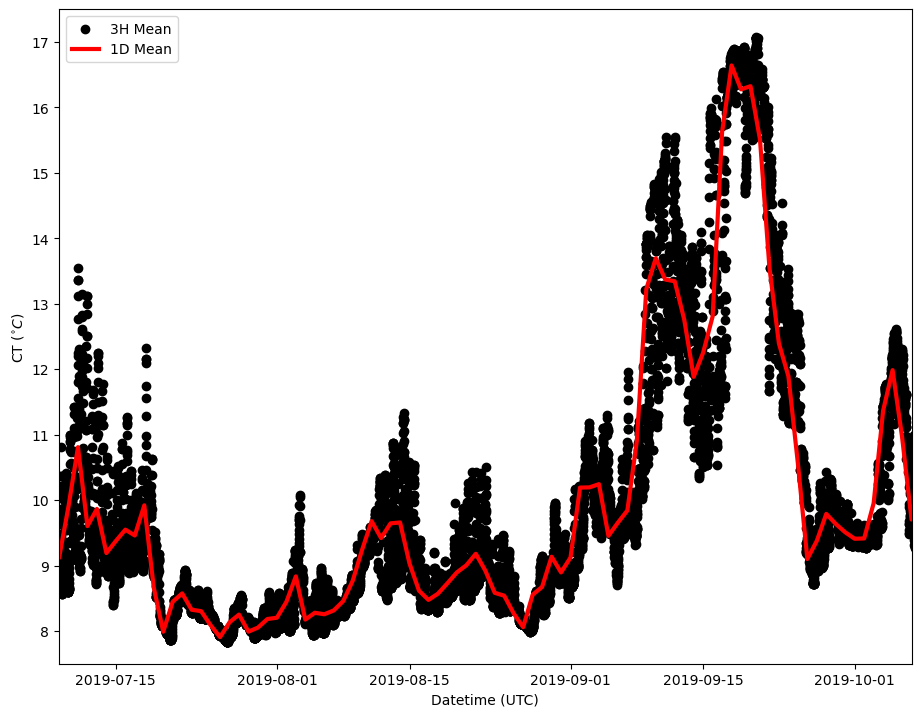

In [7]:
fig, ax = plt.subplots(1,1,figsize = (11,8.5))

ax.scatter(seafloor.index, seafloor.CT, color = 'black', label = '3H Mean')
ax.plot(seafloor_avg.index, seafloor_avg. CT, color = 'red', label = '1D Mean', linewidth = 3)

ax.set_ylabel(r"CT ($^{\circ}C$)")
ax.set_xlabel('Datetime (UTC)')

ax.set_xlim(datetime(2019,7,9),datetime(2019,10,7))
ax.set_ylim(7.5,17.5)
ax.set_yticks([8,9,10,11,12,13,14,15,16,17])

ax.legend(loc = 'upper left')
plt.savefig(figure_save_filepath, dpi = 1200)